In [1]:
import os, sys
path_to_package = os.path.abspath(os.path.join('../../..'))
if path_to_package not in sys.path:
    sys.path.append(path_to_package)


from src.io import get_filepaths, read_phylip_file
from src.models import data_preparation
from src.utils import get_filename

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns

In [2]:
chromosome = "haploide-euploide"

original_fps = get_filepaths('/home/khaldrem/code/sc_regmod/dataset/original')
clean_fps = get_filepaths('/home/khaldrem/code/sc_regmod/dataset/clean')
anova_fps_exp_2 = get_filepaths(f"/home/khaldrem/code/sc_regmod/dataset/anova/anova_at_least_one_phenotype/p_value_0_01/{chromosome}")

In [3]:
print(f"Cantidad de archivos proceso 2 - exp 1: {len(anova_fps_exp_2)}")

Cantidad de archivos proceso 2 - exp 1: 5882


In [4]:
df_files = {}

filenames = []
original_length = []
clean_length = []
anova_length = []

for f in original_fps:
    data = read_phylip_file(f)
    filename = get_filename(f)

    filenames.append(filename)
    original_length.append(data.get_alignment_length())

    clean_path = f"/home/khaldrem/code/sc_regmod/dataset/clean/{filename}.phylip"
    if os.path.exists(clean_path):
        data2 = read_phylip_file(clean_path)
        clean_length.append(data2.get_alignment_length())
    else:
        clean_length.append(-1)

    anova_path = f"/home/khaldrem/code/sc_regmod/dataset/anova/anova_at_least_one_phenotype/p_value_0_01/{chromosome}/{filename}.phylip"
    if os.path.exists(anova_path):
        data3 = read_phylip_file(anova_path)
        anova_length.append(data3.get_alignment_length())
    else:
        anova_length.append(-1)


df_files["filenames"] = filenames
df_files["Original"] = original_length
df_files["Proceso_1"] = clean_length
df_files["Proceso_2"] = anova_length

df_len = pd.DataFrame.from_dict(df_files)

In [5]:
df_len.head()

,filenames,Original,Proceso_1,Proceso_2
0,YNR029C,1290,161,2
1,YOR059C,1353,176,2
2,YJR062C,1375,194,34
3,YJL123C,1565,363,37
4,YJL203W,843,122,15


In [6]:
df_len.loc[df_len['Proceso_2']!= -1, 'percentage'] = 1 - (df_len["Proceso_2"]/df_len["Proceso_1"])

In [7]:
print(f"Cantidad de archivos que presentaron un 50% o mas de: {df_len.loc[(df_len['Proceso_2'] != -1) & (df_len['percentage'] >= 0.5)].shape[0]}")

Cantidad de archivos que presentaron un 50% o mas de: 5881


In [8]:
print(f"Cantida de archivos que fueron eliminados: {df_len.loc[(df_len['Proceso_2'] == -1)].shape[0]} (Respecto a la cantidad original)")

Cantida de archivos que fueron eliminados: 133 (Respecto a la cantidad original)


In [9]:
print("Nombres: ")
print(len(df_len.loc[(df_len['Proceso_2'] == -1) & (df_len['Proceso_1'] != -1)]["filenames"].tolist()))
df_len.loc[(df_len['Proceso_2'] == -1) & (df_len['Proceso_1'] != -1)]["filenames"].tolist()

Nombres: 
95


['YPR039W',
 'YDR210W',
 'YDL067C',
 'YPL280W',
 'YAR068W',
 'YHL049C',
 'YPL271W',
 'YLR167W',
 'YCR083W',
 'YGL029W',
 'YGR226C',
 'YLR043C',
 'YNL019C',
 'YER189W',
 'YIL065C',
 'YJL009W',
 'YCL056C',
 'YOL139C',
 'YOR302W',
 'YOR174W',
 'YCR096C',
 'YJR012C',
 'YHR087W',
 'YMR072W',
 'YHR054C',
 'YLR402W',
 'YFL061W',
 'YDL158C',
 'YGL042C',
 'YJR157W',
 'YCL012C',
 'YLR327C',
 'YAR064W',
 'YOR045W',
 'YDR007W',
 'YJR123W',
 'YAR066W',
 'YKL224C',
 'YJR014W',
 'YIL029C',
 'YNL015W',
 'YCR040W',
 'YER057C',
 'YLR462W',
 'YPL281C',
 'YGR008C',
 'YNL031C',
 'YDR008C',
 'YBR302C',
 'YDL118W',
 'YNL335W',
 'YJL222W',
 'YCR039C',
 'YGL041C',
 'YPR016C',
 'YNL030W',
 'YLL066C',
 'YDL050C',
 'YPL142C',
 'YMR175W',
 'YOL037C',
 'YCL066W',
 'YLR463C',
 'YNR037C',
 'YDL245C',
 'YLL064C',
 'YDL247W',
 'YNR076W',
 'YNL079C',
 'YFL066C',
 'YGL221C',
 'YOR020C',
 'YFL064C',
 'YIL008W',
 'YOL040C',
 'YNL028W',
 'YBL112C',
 'YHR147C',
 'YLR161W',
 'YIL027C',
 'YLR162W',
 'YGR018C',
 'YDL232W',
 'YG

In [10]:
print("Datos proceso 2: ")
print(f"mean: {df_len['Proceso_2'].mean()}")
print(f"std: {df_len['Proceso_2'].std()}")
print(f"var: {df_len['Proceso_2'].var()}")
print()

Datos proceso 2: 
mean: 16.84638403990025
std: 21.893581457155324
var: 479.32890902109546



In [11]:
df_len.describe()

,Original,Proceso_1,Proceso_2,percentage
count,6015.000000,6015.000000,6015.000000,5882.000000
mean,1468.670158,220.279468,16.846384,0.922665
std,1132.129197,264.945442,21.893581,0.041268
min,78.000000,-1.000000,-1.000000,0.473373
25%,690.000000,93.000000,6.000000,0.903042
50%,1182.000000,159.000000,11.000000,0.928571
75%,1877.000000,270.000000,21.000000,0.949845
max,14737.000000,6609.000000,457.000000,0.995413


In [12]:
df_len.head()

,filenames,Original,Proceso_1,Proceso_2,percentage
0,YNR029C,1290,161,2,0.987578
1,YOR059C,1353,176,2,0.988636
2,YJR062C,1375,194,34,0.824742
3,YJL123C,1565,363,37,0.898072
4,YJL203W,843,122,15,0.877049


Text(0, 0.5, 'Largo de la secuencia')

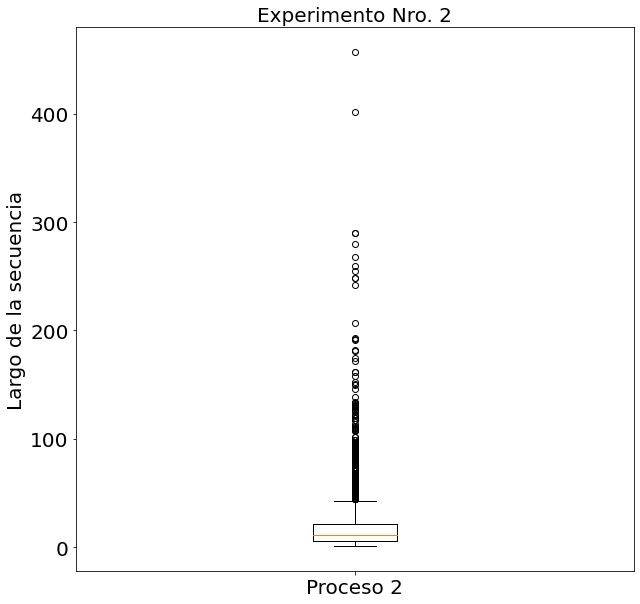

In [16]:
NRO_EXP = 2
proc2 = df_len.loc[df_len["Proceso_2"] != -1]

plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)
fig, ax = plt.subplots(figsize=(10, 10))
ax.boxplot(proc2["Proceso_2"])
ax.set_title(f'Experimento Nro. {NRO_EXP}', fontsize=20)

plt.xticks([1], ['Proceso 2'])
plt.ylabel("Largo de la secuencia", fontsize=20)